Find some documentation about sparse subsetting [here](https://toolbox-docs.marine.copernicus.eu/en/v2.1.0b1/usage/subset-usage.html#sparse-data-subsetting).  


Disclaimer: INSITU datasets are sparse and hence the possible extent of the request can be huge even for a few data. Please be mindful of restricting the area of the request (on all dimensions). 

In [1]:
!pip install copernicusmarine==2.1.0b1 --pre

  Using cached copernicusmarine-2.1.0b1-py3-none-any.whl.metadata (8.1 kB)
  Using cached arcosparse-0.3.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached pyarrow-19.0.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached copernicusmarine-2.1.0b1-py3-none-any.whl (110 kB)
Using cached arcosparse-0.3.3-py3-none-any.whl (24 kB)
Using cached pyarrow-19.0.1-cp312-cp312-manylinux_2_28_x86_64.whl (42.1 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
  Attempting uninstall: copernicusmarine
    Found existing installation: copernicusmarine 2.0.1
    Uninstalling copernicusmarine-2.0.1:
      Successfully uninstalled copernicusmarine-2.0.1


In [2]:
import copernicusmarine
# version should be 2.1.0b1 if not maybe it's necessary to reload the python kernel
copernicusmarine.__version__

'2.1.0b1'

In [3]:
import pandas as pd

In [4]:
dataset_insitu = "cmems_obs-ins_arc_phybgcwav_mynrt_na_irr"
def requestinsitu(min, max):
    df = copernicusmarine.read_dataframe(
      username = 'ldrouineau',
      password = 'Mozart78!',
      dataset_id=dataset_insitu,
      minimum_depth=min,
      maximum_depth=max,
      variables=["TEMP"],
      dataset_part="latest",
    )
    return df

The whole subsetting should work the same as subsetting gridded datasets. The result is different as it comes as a CSV, pandas.DataFrame or Parquet file. You can read more about it in [the documentation](https://toolbox-docs.marine.copernicus.eu/en/v2.1.0b1/usage/subset-usage.html#sparse-data-subsetting).

In [5]:
import matplotlib.pyplot as plt


def plot_qc_pie_chart(df, column='value_qc', title="Distribution of QC Flags", ax=None):
    # Count occurrences of each QC value
    qc_counts = df['value_qc'].value_counts().sort_index()
    
    # Optional: map QC codes to descriptive labels
    qc_labels = {
        0: 'No QC',
        1: 'Good',
        2: 'Probably good',
        3: 'Probably bad',
        4: 'Bad',
        5: 'Changed',
        6: 'Bellow detection',
        7: 'Nominal',
        8: 'Interpolated',
        9: 'Missing'
    }
    qc_colors = {
        0: 'gray',
        1: 'lightgreen',
        2: 'lightblue',
        3: 'lightsalmon',  # light orange
        4: 'red',
        5: 'maroon',
        6: 'violet',
        7: 'black',
        8: 'blue'
    }
    # Match labels with counts (default to str(code) if unknown)
    labels = [qc_labels.get(qc, str(qc)) for qc in qc_counts.index]
    colors = [qc_colors.get(qc, 'white') for qc in qc_counts.index]

    # Plot on the specified axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(qc_counts, labels=labels, colors=colors, autopct='%1.1f%%',
           startangle=90, counterclock=False)
    ax.set_title(title, fontsize=12)

In [6]:
df1 = requestinsitu(0, 100)
df2 = requestinsitu(100, 500)
df3 = requestinsitu(500, 1000)
df4 = requestinsitu(1000, 1500)
df5 = requestinsitu(1500, 2000)
df6 = requestinsitu(2000, 6000)

INFO - 2025-04-14T14:35:13Z - Selected dataset version: "202311"
INFO - 2025-04-14T14:35:13Z - Selected dataset part: "latest"
INFO - 2025-04-14T14:35:24Z - Selected dataset version: "202311"
INFO - 2025-04-14T14:35:24Z - Selected dataset part: "latest"
INFO - 2025-04-14T14:35:33Z - Selected dataset version: "202311"
INFO - 2025-04-14T14:35:33Z - Selected dataset part: "latest"
INFO - 2025-04-14T14:35:38Z - Selected dataset version: "202311"
INFO - 2025-04-14T14:35:38Z - Selected dataset part: "latest"
INFO - 2025-04-14T14:35:41Z - Selected dataset version: "202311"
INFO - 2025-04-14T14:35:41Z - Selected dataset part: "latest"
INFO - 2025-04-14T14:35:43Z - Selected dataset version: "202311"
INFO - 2025-04-14T14:35:43Z - Selected dataset part: "latest"


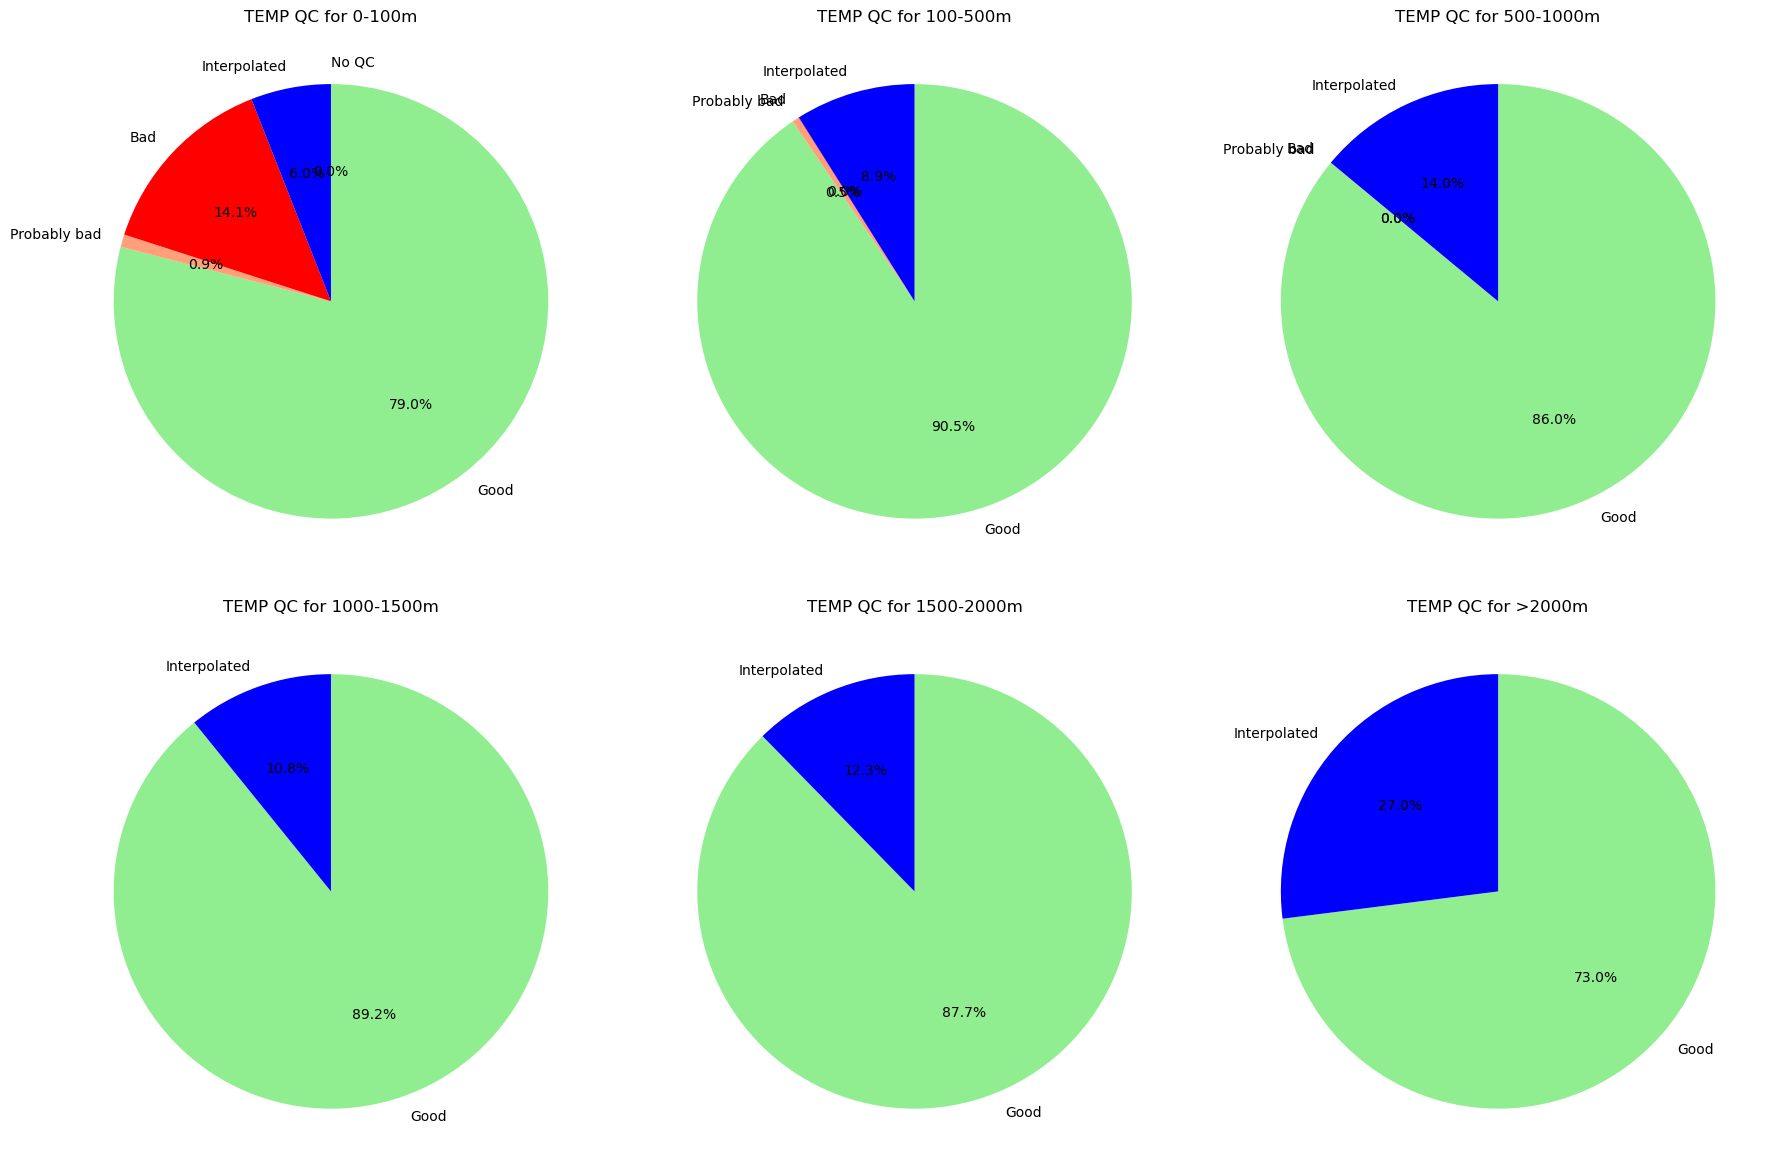

In [7]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# List of dataframes and titles for each depth range
dataframes = [df1, df2, df3, df4, df5, df6]
titles = ['TEMP QC for 0-100m', 'TEMP QC for 100-500m', 'TEMP QC for 500-1000m',
          'TEMP QC for 1000-1500m', 'TEMP QC for 1500-2000m', 'TEMP QC for >2000m']

# Loop over each subplot and dataframe
for i, ax in enumerate(axes.flatten()):
    plot_qc_pie_chart(dataframes[i], title=titles[i], ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
import matplotlib.pyplot as plt


def plot_type_pie_chart(df, column='platform_type', title="Distribution of QC Flags", ax=None):
    # Count occurrences of each QC value
    platform_col = 'platform_type' if 'platform_type' in df.columns else 'entity_type'
    qc_counts = df[platform_col].value_counts().sort_index()
    
    # Optional: map QC codes to descriptive labels
    'CT', 'DB', 'FB', 'GL', 'MO', 'PF', 'TS', 'XX'
    type_labels = {
        'CT': 'CTD',
        'DB': 'drfiters',
        'FB': 'ferryboxes',
        'GL': 'gliders',
        'MO': 'moorings',
        'PF': 'profilers',
        'TS': 'thermosalinometers',
        'XX': 'unknown',
    }
    type_colors = {
        'CT': 'gray',
        'DB': 'lightgreen',
        'FB': 'lightblue',
        'GL': 'lightsalmon',  # light orange
        'MO': 'red',
        'PF': 'maroon',
        'TS': 'violet',
        'XX': 'black',
    }
    # Match labels with counts (default to str(code) if unknown)
    labels = [type_labels.get(qc, str(qc)) for qc in qc_counts.index]
    colors = [type_colors.get(qc, 'white') for qc in qc_counts.index]

    # Plot on the specified axis
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(qc_counts, labels=labels, colors=colors, autopct='%1.1f%%',
           startangle=90, counterclock=False)
    ax.set_title(title, fontsize=12)

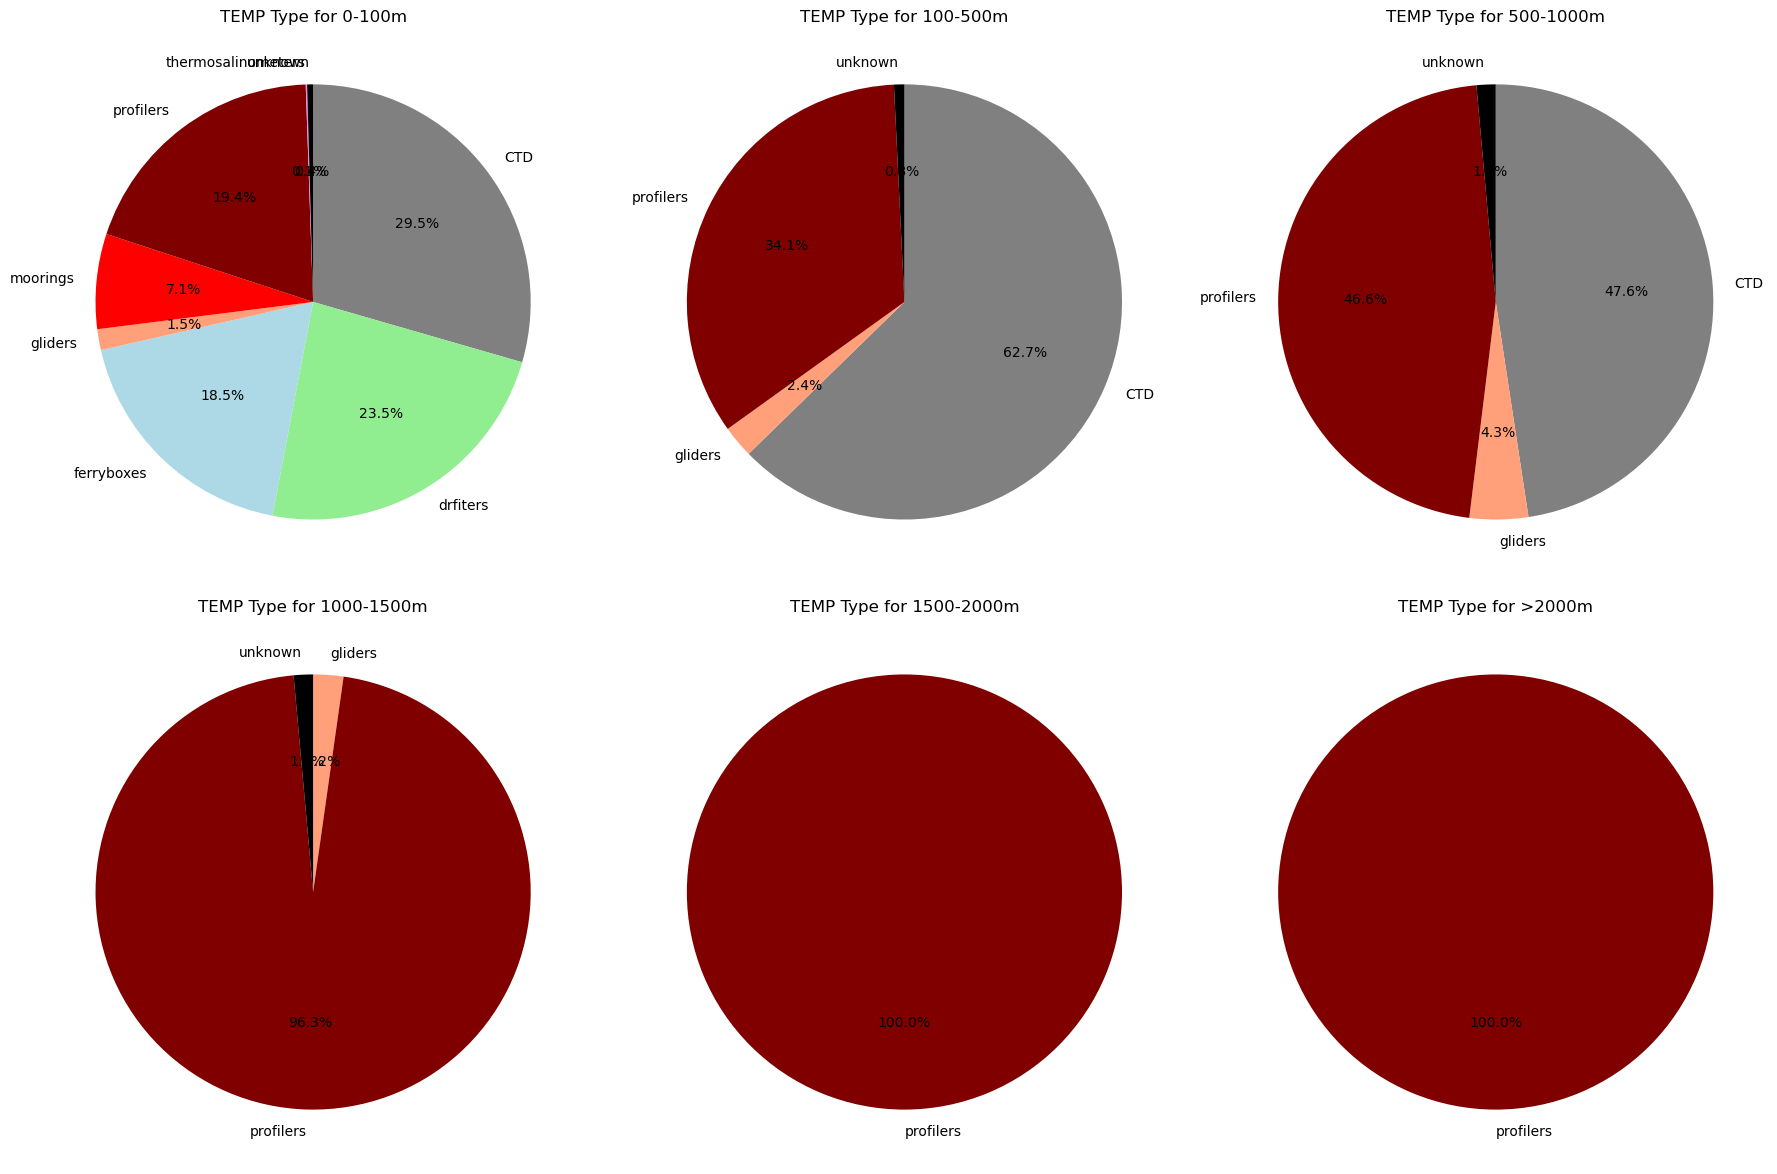

In [18]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# List of dataframes and titles for each depth range
dataframes = [df1, df2, df3, df4, df5, df6]
titles = ['TEMP Type for 0-100m', 'TEMP Type for 100-500m', 'TEMP Type for 500-1000m',
          'TEMP Type for 1000-1500m', 'TEMP Type for 1500-2000m', 'TEMP Type for >2000m']

# Loop over each subplot and dataframe
for i, ax in enumerate(axes.flatten()):
    plot_type_pie_chart(dataframes[i], title=titles[i], ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()